In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 145674 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.14-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive
import tensorflow as tf

In [0]:
tf.compat.v1.disable_eager_execution()

In [0]:
path = '/content/drive/ColabNotebooks/cities/Jaipur2016-2019.csv'

In [0]:
import pandas as pd

df = pd.read_csv(path)

In [0]:
df.head()

,utc,location,city,value
0,2016-03-21T18:30:00.000Z,VK Industrial Area Jaipur - RSPCB,Jaipur,36.3
1,2016-03-22T00:30:00.000Z,VK Industrial Area Jaipur - RSPCB,Jaipur,30.6
2,2016-03-22T00:45:00.000Z,VK Industrial Area Jaipur - RSPCB,Jaipur,30.6
3,2016-03-22T01:00:00.000Z,VK Industrial Area Jaipur - RSPCB,Jaipur,45.2
4,2016-03-22T01:15:00.000Z,VK Industrial Area Jaipur - RSPCB,Jaipur,47.4


In [0]:
df['utc'] =pd.to_datetime(df.utc)

In [0]:
df.index = df['utc']
df.head()

,utc,location,city,value
utc,,,,
2016-03-21 18:30:00+00:00,2016-03-21 18:30:00+00:00,VK Industrial Area Jaipur - RSPCB,Jaipur,36.3
2016-03-22 00:30:00+00:00,2016-03-22 00:30:00+00:00,VK Industrial Area Jaipur - RSPCB,Jaipur,30.6
2016-03-22 00:45:00+00:00,2016-03-22 00:45:00+00:00,VK Industrial Area Jaipur - RSPCB,Jaipur,30.6
2016-03-22 01:00:00+00:00,2016-03-22 01:00:00+00:00,VK Industrial Area Jaipur - RSPCB,Jaipur,45.2
2016-03-22 01:15:00+00:00,2016-03-22 01:15:00+00:00,VK Industrial Area Jaipur - RSPCB,Jaipur,47.4


In [0]:
len(df[df.value > 500])


192

In [0]:
df = df[df.value != 0.00]

In [0]:
df = df[df.value > 0]

In [0]:
df = df[df.value < 500]

In [0]:
df.isnull().values.any()

False

In [0]:
  df.head()

,utc,location,city,value
utc,,,,
2016-03-21 18:30:00+00:00,2016-03-21 18:30:00+00:00,VK Industrial Area Jaipur - RSPCB,Jaipur,36.3
2016-03-22 00:30:00+00:00,2016-03-22 00:30:00+00:00,VK Industrial Area Jaipur - RSPCB,Jaipur,30.6
2016-03-22 00:45:00+00:00,2016-03-22 00:45:00+00:00,VK Industrial Area Jaipur - RSPCB,Jaipur,30.6
2016-03-22 01:00:00+00:00,2016-03-22 01:00:00+00:00,VK Industrial Area Jaipur - RSPCB,Jaipur,45.2
2016-03-22 01:15:00+00:00,2016-03-22 01:15:00+00:00,VK Industrial Area Jaipur - RSPCB,Jaipur,47.4


In [0]:
len(df)

83816

In [0]:
daily_groups = df.resample('60T')

In [0]:
hourly_data = daily_groups.mean()

In [0]:
hourly_data = hourly_data.dropna()

In [0]:
len(hourly_data[hourly_data.value == 0])

0

In [0]:
print(hourly_data.shape)
print(hourly_data)

(18713, 1)
                               value
utc                                 
2016-03-21 18:00:00+00:00  36.300000
2016-03-22 00:00:00+00:00  30.600000
2016-03-22 01:00:00+00:00  46.850000
2016-03-22 02:00:00+00:00  38.500000
2016-03-22 03:00:00+00:00  36.350000
...                              ...
2019-12-28 10:00:00+00:00  58.265833
2019-12-28 11:00:00+00:00  46.514286
2019-12-28 12:00:00+00:00  44.106364
2019-12-28 13:00:00+00:00  49.293333
2019-12-28 14:00:00+00:00  52.850000

[18713 rows x 1 columns]


In [0]:
hourly_data

,value
utc,
2016-03-22 10:00:00+00:00,86.200000
2016-03-24 07:00:00+00:00,113.530000
2016-03-24 10:00:00+00:00,102.570000
2016-03-25 10:00:00+00:00,118.260000
2016-03-28 04:00:00+00:00,141.250000
...,...
2019-12-18 03:00:00+00:00,69.762857
2019-12-18 04:00:00+00:00,86.550833
2019-12-18 05:00:00+00:00,84.516667


In [0]:
hourly_data['value'] = hourly_data['value'].astype(float)

In [0]:
features.dtypes

value    float64
dtype: object

In [0]:
features_considered = ['value']
features = hourly_data[features_considered]

features.head()

,value
utc,
2016-03-21 18:00:00+00:00,36.30
2016-03-22 00:00:00+00:00,30.60
2016-03-22 01:00:00+00:00,46.85
2016-03-22 02:00:00+00:00,38.50
2016-03-22 03:00:00+00:00,36.35


In [0]:
def load_timeseries(data, params):
	"""Load time series dataset"""

	
	data = data.values

	adjusted_window = params['window_size']+ 1

	# Split data into windows
	raw = []
	for index in range(len(data) - adjusted_window):
		raw.append(data[index: index + adjusted_window])

	# Normalize data
	result = normalize_windows(raw)

	raw = np.array(raw)
	result = np.array(result)

	# Split the input dataset into train and test
	split_ratio = round(params['train_test_split'] * result.shape[0])
	train = result[:int(split_ratio), :]
	np.random.shuffle(train)

	# x_train and y_train, for training
	x_train = train[:, :-1]
	y_train = train[:, -1]

	# x_test and y_test, for testing
	x_test = result[int(split_ratio):, :-1]
	y_test = result[int(split_ratio):, -1]

	x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
	x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

	x_test_raw = raw[int(split_ratio):, :-1]
	y_test_raw = raw[int(split_ratio):, -1]

	# Last window, for next time stamp prediction
	last_raw = [data[-params['window_size']:]]
	last = normalize_windows(last_raw)
	last = np.array(last)
	last = np.reshape(last, (last.shape[0], last.shape[1], 1))

	return [x_train, y_train, x_test, y_test, x_test_raw, y_test_raw, last_raw, last]

def normalize_windows(window_data):
	"""Normalize data"""

	normalized_data = []
	for window in window_data:
		normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
		normalized_data.append(normalized_window)
	return normalized_data

In [0]:
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

def rnn_lstm(layers, params):
	"""Build RNN (LSTM) model on top of Keras and Tensorflow"""

	model = Sequential()
	model.add(LSTM(input_shape=(layers[1], layers[0]), output_dim=layers[1], return_sequences=True))
	model.add(Dropout(params['dropout_keep_prob']))
	model.add(LSTM(layers[2], return_sequences=False))
	model.add(Dropout(params['dropout_keep_prob']))
	model.add(Dense(output_dim=layers[3]))
	model.add(Activation("tanh"))

	model.compile(loss="mean_squared_error", optimizer="rmsprop")
	return model

def predict_next_timestamp(model, history):
	"""Predict the next time stamp given a sequence of history data"""

	prediction = model.predict(history)
	prediction = np.reshape(prediction, (prediction.size,))
	return prediction 

Using TensorFlow backend.


In [0]:
import sys 
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('/content/drive/ColabNotebooks/')

def train_predict(path, config_data):
  train_file = path
  parameter = config_data

  params = json.loads(parameter)

  x_train, y_train, x_test, y_test, x_test_raw, y_test_raw, last_window_raw, last_window = load_timeseries(train_file, params)

  lstm_layer = [1, params['window_size'], params['hidden_unit'], 1]
  model = rnn_lstm(lstm_layer, params)
  model.fit(x_train, y_train, batch_size=params['batch_size'], epochs=params['epochs'], validation_split=params['validation_split'])
  model.save('/content/drive/ColabNotebooks/models/Jaipur-Dec-28-19.h5')
  predicted = predict_next_timestamp(model, x_test)
  predicted_raw = []
  for i in range(len(x_test_raw)):
    predicted_raw.append((predicted[i] + 1) * x_test_raw[i][0])

  
  plt.subplot(111)
  plt.plot(predicted_raw, label='Actual')
  plt.plot(y_test_raw, label='Predicted')
  plt.legend()
  plt.show()


  next_timestamp = predict_next_timestamp(model, last_window)
  next_timestamp_raw = (next_timestamp[0] + 1) * last_window_raw[0][0]
  print('The next time stamp forecasting is: {}'.format(next_timestamp_raw))

In [0]:
js = json.dumps({
	"epochs": 20,
	"batch_size": 256,
	"window_size": 480,
	"train_test_split": 0.8,
	"validation_split": 0.2,
	"dropout_keep_prob": 0.2,
	"hidden_unit": 50
})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(480, 1), return_sequences=True, units=480)`
  # Remove the CWD from sys.path while we load stuff.



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 11668 samples, validate on 2918 samples
Epoch 1/20





11668/11668 [==============================] - 102s 9ms/step - loss: 1833.0124 - val_loss: 14.0366
Epoch 2/20
11668/11668 [==============================] - 91s 8ms/step - loss: 1832.9177 - val_loss: 13.9623
Epoch 3/20
11668/11668 [==============================] - 89s 8ms/step - loss: 1832.8768 - val_loss: 13.9427
Epoch 4/20
11668/11668 [==============================] - 89s 8ms/step - loss: 1832.8632 - val_loss: 13.9345
Epoch 5/20
11668/11668 [==============================] - 88s 8ms/step - loss: 1833.0228 - val_loss: 14.0283
Epoch 6/20
11668/11668 [==============================] - 89s 8ms/step - loss: 1833.0019 - val_loss: 14.0317
Epoch 7/20
11668/11668 [==============================] - 90s 8ms/step - loss: 1832.9104 - val_loss: 13.9444
Epoch 8/20
11668/11668 [==============================] - 90s 8ms/step - loss: 1832.8

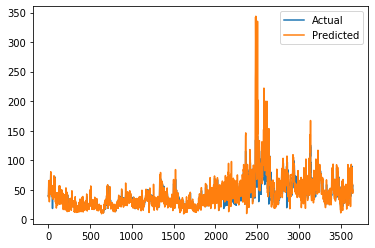

The next time stamp forecasting is: [60.38053804]


In [0]:
train_predict(features, js)